# Text mining LOTR

In [107]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [108]:
myfile = open(r"C:\Users\ryani\Desktop\JupyterLab\Alice_Analysis_RGN\alice_in_wonderland.txt", encoding='utf-8') 

In [109]:
# Import txt file

with open('alice_in_wonderland.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [110]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [111]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

["Alice's Adventures in Wonderland                ALICE'S ADVENTURES IN WONDERLAND                          Lewis Carroll               THE MILLENNIUM FULCRUM EDITION 3.0                            CHAPTER I                      Down the Rabbit-Hole  Alice was beginning to get very tired of sitting by her sisteron the bank, and of having nothing to do:  once or twice she hadpeeped into the book her sister was reading, but it had nopictures or conversations in it, `and what is the use of a book,'thought Alice `without pictures or conversation?'", 'So she was considering in her own mind (as well as she could,for the hot day made her feel very sleepy and stupid), whetherthe pleasure of making a daisy-chain would be worth the troubleof getting up and picking the daisies, when suddenly a WhiteRabbit with pink eyes ran close by her.', 'There was nothing so VERY remarkable in that; nor did Alicethink it so VERY much out of the way to hear the Rabbit say toitself, `Oh dear!', 'Oh dear!', "I sh

In [112]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Alice', "'s", 'Adventures', 'in', 'Wonderland', 'ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', '3.0', 'CHAPTER', 'I', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sisteron', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'hadpeeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'nopictures', 'or', 'conversations', 'in', 'it', ',', '`', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'thought", 'Alice', '`', 'without', 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', ')', ',', 'whetherthe', 'pleasure', 'of', 'making', 'a', 'daisy-chain', 'would', 'be', 'worth

In [113]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4133 samples and 32850 outcomes>


In [114]:
dist_words.most_common(10)

[(',', 2418),
 ('the', 1342),
 ('`', 1109),
 ("'", 1076),
 ('.', 920),
 ('and', 714),
 ('to', 647),
 ('a', 547),
 ('I', 487),
 ('it', 471)]

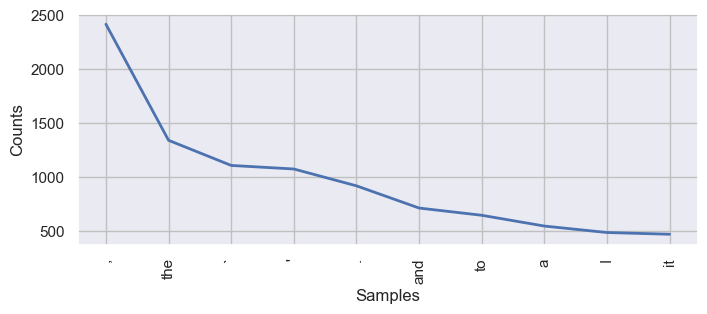

In [115]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stopwords

In [116]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'your', 'above', 'too', 've', 'having', 'until', 'with', "it's", 'weren', 'against', 'because', "isn't", 'out', "hadn't", 'is', 'below', 'doing', "he'd", 'y', 'haven', "you're", 'an', 'that', 'ourselves', "haven't", 'were', 'before', 'ain', "doesn't", 'same', 'during', 'ours', "don't", 'yourselves', 'am', 'she', 'himself', 'myself', "aren't", "he'll", 'if', 'd', 'through', 's', 'mightn', 'do', 'not', 'for', 'while', 'more', "they'll", 'shan', 'his', "i'm", 'themselves', 'was', 'will', 'than', 'needn', 'of', "you'll", "she'd", "she's", "she'll", "i've", "shouldn't", "needn't", 'this', 'over', "we'll", "mustn't", "we've", "wouldn't", "i'd", 'but', 'these', 'her', 'should', 'they', 'how', 'up', 'it', 'no', "you've", "didn't", "won't", 'being', 'hasn', 'between', 'shouldn', 'just', 'those', "they've", 'when', 'have', 'after', "it'll", 're', "wasn't", 'you', 'll', "we're", 'about', 'does', 'once', "they'd", 'herself', 'are', 'what', 'whom', 'a', 'him', 'then', "i'll", 'where', 'my', "they'

In [117]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [118]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [119]:
filtered_words

['Alice',
 "'s",
 'Adventures',
 'Wonderland',
 'ALICE',
 "'S",
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 'Lewis',
 'Carroll',
 'THE',
 'MILLENNIUM',
 'FULCRUM',
 'EDITION',
 '3.0',
 'CHAPTER',
 'I',
 'Down',
 'Rabbit-Hole',
 'Alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sisteron',
 'bank',
 ',',
 'nothing',
 ':',
 'twice',
 'hadpeeped',
 'book',
 'sister',
 'reading',
 ',',
 'nopictures',
 'conversations',
 ',',
 '`',
 'use',
 'book',
 ',',
 "'thought",
 'Alice',
 '`',
 'without',
 'pictures',
 'conversation',
 '?',
 "'",
 'So',
 'considering',
 'mind',
 '(',
 'well',
 'could',
 ',',
 'hot',
 'day',
 'made',
 'feel',
 'sleepy',
 'stupid',
 ')',
 ',',
 'whetherthe',
 'pleasure',
 'making',
 'daisy-chain',
 'would',
 'worth',
 'troubleof',
 'getting',
 'picking',
 'daisies',
 ',',
 'suddenly',
 'WhiteRabbit',
 'pink',
 'eyes',
 'ran',
 'close',
 '.',
 'There',
 'nothing',
 'VERY',
 'remarkable',
 ';',
 'Alicethink',
 'VERY',
 'much',
 'way',
 'hear',
 'Rabbit',
 'say',
 'toitself',

In [120]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4010 samples and 21595 outcomes>


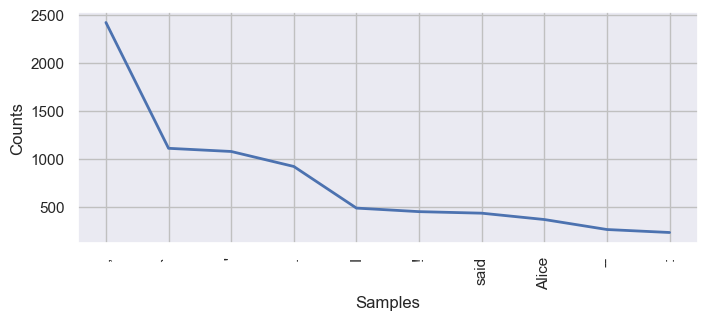

In [121]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [122]:
dist_words_filter

FreqDist({',': 2418, '`': 1109, "'": 1076, '.': 920, 'I': 487, '!': 450, 'said': 434, 'Alice': 368, '--': 264, ':': 233, ...})

In [123]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [124]:
sans_punc

'  Alice     s    Adventures    Wonderland    ALICE     S    ADVENTURES    IN    WONDERLAND    Lewis    Carroll    THE    MILLENNIUM    FULCRUM    EDITION           CHAPTER    I    Down    Rabbit Hole    Alice    beginning    get    tired    sitting    sisteron    bank         nothing         twice    hadpeeped    book    sister    reading         nopictures    conversations              use    book          thought    Alice         without    pictures    conversation              So    considering    mind         well    could         hot    day    made    feel    sleepy    stupid              whetherthe    pleasure    making    daisy chain    would    worth    troubleof    getting    picking    daisies         suddenly    WhiteRabbit    pink    eyes    ran    close         There    nothing    VERY    remarkable         Alicethink    VERY    much    way    hear    Rabbit    say    toitself              Oh    dear         Oh    dear         I    shall    late                   thoughti

In [125]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Alice', 's', 'Adventures', 'Wonderland', 'ALICE', 'S', 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'CHAPTER', 'I', 'Down', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sisteron', 'bank', 'nothing', 'twice', 'hadpeeped', 'book', 'sister', 'reading', 'nopictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversation', 'So', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whetherthe', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'troubleof', 'getting', 'picking', 'daisies', 'suddenly', 'WhiteRabbit', 'pink', 'eyes', 'ran', 'close', 'There', 'nothing', 'VERY', 'remarkable', 'Alicethink', 'VERY', 'much', 'way', 'hear', 'Rabbit', 'say', 'toitself', 'Oh', 'dear', 'Oh', 'dear', 'I', 'shall', 'late', 'thoughtit', 'afterwards', 'occurred', 'ought', 'havewondered', 'time', 'seemed', 'quite', 'natural', 'Rabbit', 'actually', 'TOOK

In [126]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

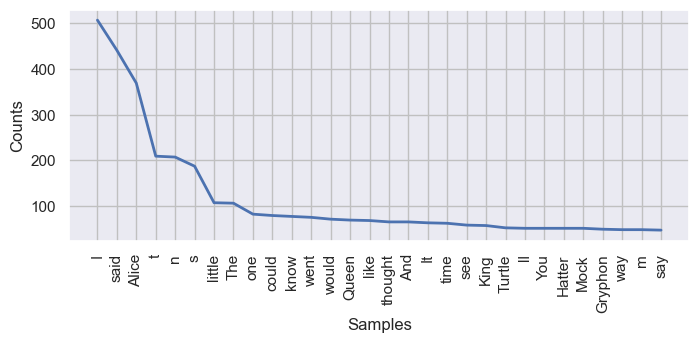

In [127]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [128]:
dist_words_filter_2.most_common(20)

[('I', 507),
 ('said', 441),
 ('Alice', 369),
 ('t', 209),
 ('n', 207),
 ('s', 187),
 ('little', 107),
 ('The', 106),
 ('one', 82),
 ('could', 79),
 ('know', 77),
 ('went', 75),
 ('would', 71),
 ('Queen', 69),
 ('like', 68),
 ('thought', 65),
 ('And', 65),
 ('It', 63),
 ('time', 62),
 ('see', 58)]

## POS Tags with TextBlob

In [129]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [130]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [131]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 5.75 ms


In [132]:
text

TextBlob("['Alice', 'Adventures', 'Wonderland', 'ALICE', 'S', 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'CHAPTER', 'I', 'Down', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sisteron', 'bank', 'nothing', 'twice', 'hadpeeped', 'book', 'sister', 'reading', 'nopictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversation', 'So', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whetherthe', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'troubleof', 'getting', 'picking', 'daisies', 'suddenly', 'WhiteRabbit', 'pink', 'eyes', 'ran', 'close', 'There', 'nothing', 'VERY', 'remarkable', 'Alicethink', 'VERY', 'much', 'way', 'hear', 'Rabbit', 'say', 'toitself', 'Oh', 'dear', 'Oh', 'dear', 'I', 'shall', 'late', 'thoughtit', 'afterwards', 'occurred', 'ought', 'havewondered', 'time', 'seemed', 'quite', 'natural', 'Rabbit', 'actually', 

In [133]:
print(type(text))

<class 'textblob.blob.TextBlob'>


In [134]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [135]:
text

TextBlob("['Alice', 'Adventures', 'Wonderland', 'ALICE', 'S', 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'CHAPTER', 'I', 'Down', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sisteron', 'bank', 'nothing', 'twice', 'hadpeeped', 'book', 'sister', 'reading', 'nopictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversation', 'So', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whetherthe', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'troubleof', 'getting', 'picking', 'daisies', 'suddenly', 'WhiteRabbit', 'pink', 'eyes', 'ran', 'close', 'There', 'nothing', 'VERY', 'remarkable', 'Alicethink', 'VERY', 'much', 'way', 'hear', 'Rabbit', 'say', 'toitself', 'Oh', 'dear', 'Oh', 'dear', 'I', 'shall', 'late', 'thoughtit', 'afterwards', 'occurred', 'ought', 'havewondered', 'time', 'seemed', 'quite', 'natural', 'Rabbit', 'actually', 

In [136]:
tags_list = text.tags

In [137]:
tags_list

[('[', 'JJ'),
 ("'Alice", 'NNP'),
 ("'", 'POS'),
 ("'Adventures", 'NNS'),
 ("'", 'POS'),
 ("'Wonderland", 'NNP'),
 ("'", 'POS'),
 ("'ALICE", 'NNP'),
 ("'", 'POS'),
 ("'S", 'VBZ'),
 ("'ADVENTURES", 'NNP'),
 ("'", 'POS'),
 ("'IN", 'NNP'),
 ("'", 'POS'),
 ("'WONDERLAND", 'CC'),
 ("'Lewis", 'NNP'),
 ("'", 'POS'),
 ("'Carroll", 'NNP'),
 ("'", 'POS'),
 ("'MILLENNIUM", 'NNP'),
 ("'", 'POS'),
 ("'FULCRUM", 'NNP'),
 ("'", 'POS'),
 ("'EDITION", 'NNP'),
 ("'", 'POS'),
 ('I', 'PRP'),
 ("'Rabbit", 'NNP'),
 ("'", 'POS'),
 ("'Hole", 'NNP'),
 ("'", 'POS'),
 ("'Alice", 'NNP'),
 ("'", 'POS'),
 ("'beginning", 'VBG'),
 ("'get", 'NNP'),
 ("'", 'POS'),
 ("'tired", 'VBD'),
 ("'sitting", 'VBG'),
 ("'sisteron", 'NNP'),
 ("'", 'POS'),
 ("'bank", 'NNP'),
 ("'", 'POS'),
 ("'nothing", 'VBG'),
 ("'twice", 'NNP'),
 ("'", 'POS'),
 ("'hadpeeped", 'VBD'),
 ("'book", 'NNP'),
 ("'", 'POS'),
 ("'sister", 'NNP'),
 ("'", 'POS'),
 ("'reading", 'VBG'),
 ("'nopictures", 'NNS'),
 ("'", 'POS'),
 ("'conversations", 'NNS'),
 ("'",

In [138]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [139]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Alice,NNP
2,',POS
3,'Adventures,NNS
4,',POS


In [140]:
df_t = df_text.groupby('Word type').count().reset_index()

In [141]:
df_t.head()

,Word type,Words
0,CC,2
1,CD,199
2,DT,40
3,EX,65
4,FW,11


In [142]:
top20 = df_t.nlargest(20, 'Words')

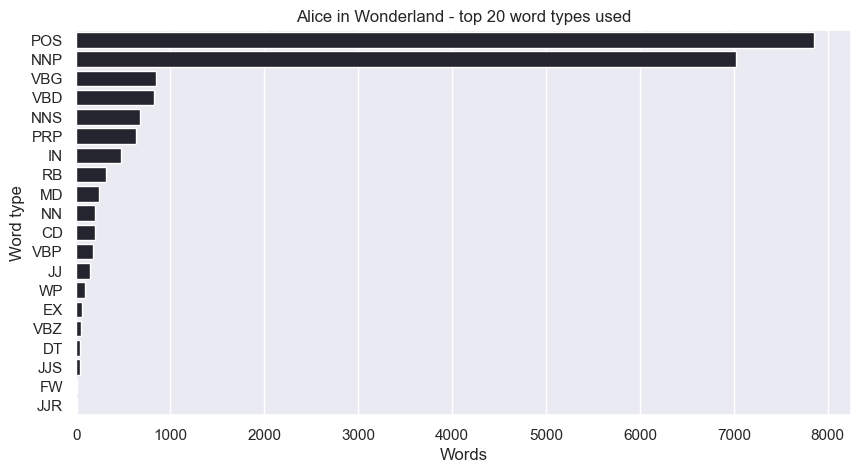

In [143]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("Alice in Wonderland - top 20 word types used")

In [144]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

#### Nouns

In [145]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [146]:
top10

,Word,Occurences
1579,'said,441
11,'Alice,369
1225,'little,107
1173,'know,77
2072,'went,75
1913,'thought,65
156,'It,63
1929,'time,62
1610,'see,58
340,'Turtle,52


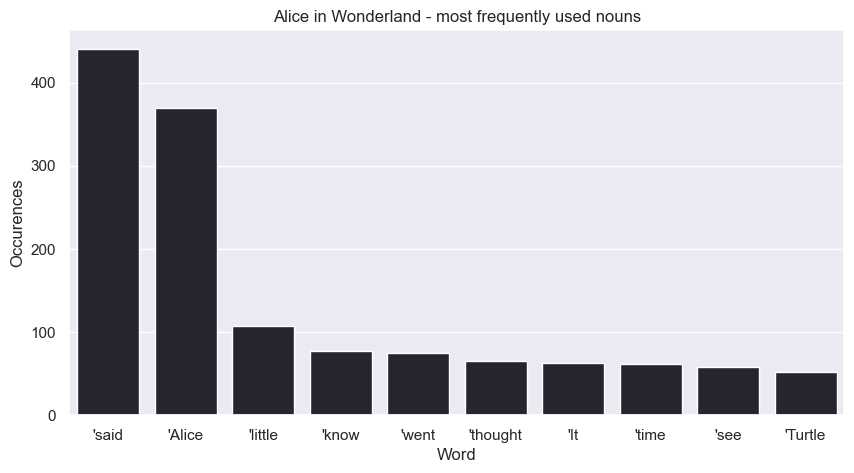

In [147]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10).set_title("Alice in Wonderland - most frequently used nouns")

#### Verbs

In [148]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [149]:
top10

,Word,Occurences
165,'looked,38
232,'replied,27
240,'seemed,22
17,'added,21
77,'cried,19
123,'got,18
302,'turned,16
299,'tried,15
55,'called,13
36,'asked,13


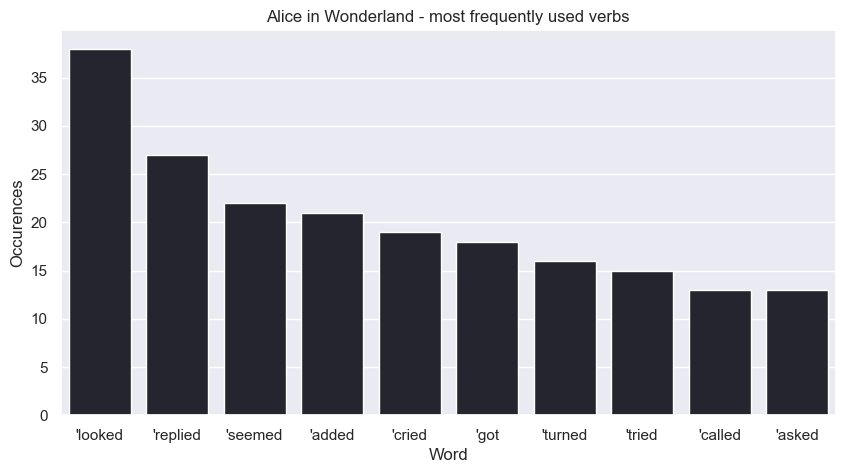

In [150]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("Alice in Wonderland - most frequently used verbs")

#### Adjectives

In [151]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

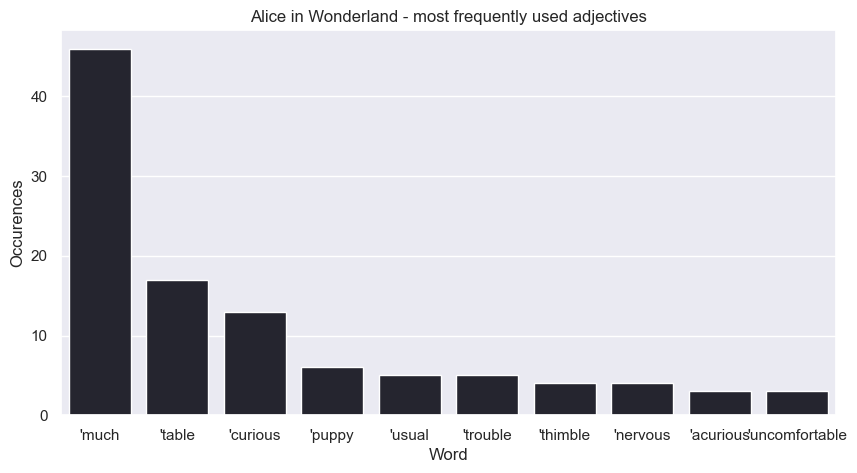

In [152]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Alice in Wonderland - most frequently used adjectives")

## Counting character occurences

In [153]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Alice Adventures Wonderland ALICE S ADVENTURES IN WONDERLAND Lewis Carroll THE MILLENNIUM FULCRUM EDITION CHAPTER I Down Rabbit Hole Alice beginning get tired sitting sisteron bank nothing twice hadpeeped book sister reading nopictures conversations use book thought Alice without pictures conversation So considering mind well could hot day made feel sleepy stupid whetherthe pleasure making daisy chain would worth troubleof getting picking daisies suddenly WhiteRabbit pink eyes ran close There nothing VERY remarkable Alicethink VERY much way hear Rabbit say toitself Oh dear Oh dear I shall late thoughtit afterwards occurred ought havewondered time seemed quite natural Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT POCKET looked hurried Alice started toher feet flashed across mind neverbefore seen rabbit either waistcoat pocket watch totake burning curiosity ran across thefield fortunately time see popdown large rabbit hole hedge In another moment went Alice never onceconsidering worl

In [154]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [155]:
all_counts

Counter({'I': 507,
         'said': 441,
         'Alice': 369,
         'little': 107,
         'one': 82,
         'could': 79,
         'know': 77,
         'went': 75,
         'would': 71,
         'Queen': 69,
         'like': 68,
         'thought': 65,
         'It': 63,
         'time': 62,
         'see': 58,
         'King': 57,
         'Turtle': 52,
         'll': 51,
         'You': 51,
         'Hatter': 51,
         'Mock': 51,
         'Gryphon': 49,
         'way': 48,
         'm': 48,
         'say': 47,
         'began': 47,
         'much': 46,
         'quite': 46,
         'head': 45,
         'think': 43,
         'go': 43,
         'Rabbit': 42,
         'got': 41,
         'What': 41,
         'get': 40,
         'well': 40,
         've': 40,
         'thing': 40,
         'voice': 40,
         'must': 39,
         'looked': 38,
         'She': 38,
         'first': 38,
         'tone': 38,
         'Duchess': 37,
         're': 36,
         'But': 36,
     

In [156]:
chars = pd.read_csv("Alice_characters.csv", index_col = 0)

In [157]:
chars.head()

,character
0,Alice
1,The White Rabbit
2,The Mouse
3,The Dodo
4,The Lory


In [158]:
# Replace names with aliases

chars['character'] = chars['character'].replace('Bill the Lizard','Bill')
chars['character'] = chars['character'].replace('The Queen of Hearts','Queen')
chars['character'] = chars['character'].replace('The King of Hearts','King')
chars['character'] = chars['character'].replace('The Knave of Hearts','Knave')

In [159]:
chars

,character
0,Alice
1,The White Rabbit
2,The Mouse
3,The Dodo
4,The Lory
5,The Eaglet
6,The Duck
7,Pat
8,Bill
9,Puppy


In [160]:
chars['character_alias'] = chars['character'].apply(lambda x: x.rsplit(' ', 1)[-1])

In [161]:
chars

,character,character_alias
0,Alice,Alice
1,The White Rabbit,Rabbit
2,The Mouse,Mouse
3,The Dodo,Dodo
4,The Lory,Lory
5,The Eaglet,Eaglet
6,The Duck,Duck
7,Pat,Pat
8,Bill,Bill
9,Puppy,Puppy


In [162]:
char_list = chars['character_alias'].to_list()

In [163]:
dict_of_counts = {d : all_counts[d] for d in char_list}

In [164]:
dict_of_counts

{'Alice': 369,
 'Rabbit': 42,
 'Mouse': 29,
 'Dodo': 12,
 'Lory': 7,
 'Eaglet': 3,
 'Duck': 2,
 'Pat': 3,
 'Bill': 14,
 'Puppy': 0,
 'Caterpillar': 25,
 'Duchess': 37,
 'Cat': 25,
 'Hatter': 51,
 'Hare': 30,
 'Dormouse': 32,
 'Queen': 69,
 'King': 57,
 'Knave': 9,
 'Gryphon': 49,
 'Turtle': 52}

In [165]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [166]:
df

,Alice,Rabbit,Mouse,Dodo,Lory,Eaglet,Duck,Pat,Bill,Puppy,...,Duchess,Cat,Hatter,Hare,Dormouse,Queen,King,Knave,Gryphon,Turtle
0,369,42,29,12,7,3,2,3,14,0,...,37,25,51,30,32,69,57,9,49,52


In [167]:
df = df.transpose().reset_index()

In [168]:
df.dtypes

index    object
0         int64
dtype: object

In [169]:
df

,index,0
0,Alice,369
1,Rabbit,42
2,Mouse,29
3,Dodo,12
4,Lory,7
5,Eaglet,3
6,Duck,2
7,Pat,3
8,Bill,14
9,Puppy,0


In [170]:
df.rename(columns = {"index":"Character", 0:"Times mentioned"}, inplace = True)

In [171]:
df

,Character,Times mentioned
0,Alice,369
1,Rabbit,42
2,Mouse,29
3,Dodo,12
4,Lory,7
5,Eaglet,3
6,Duck,2
7,Pat,3
8,Bill,14
9,Puppy,0


In [172]:
df.shape

(21, 2)

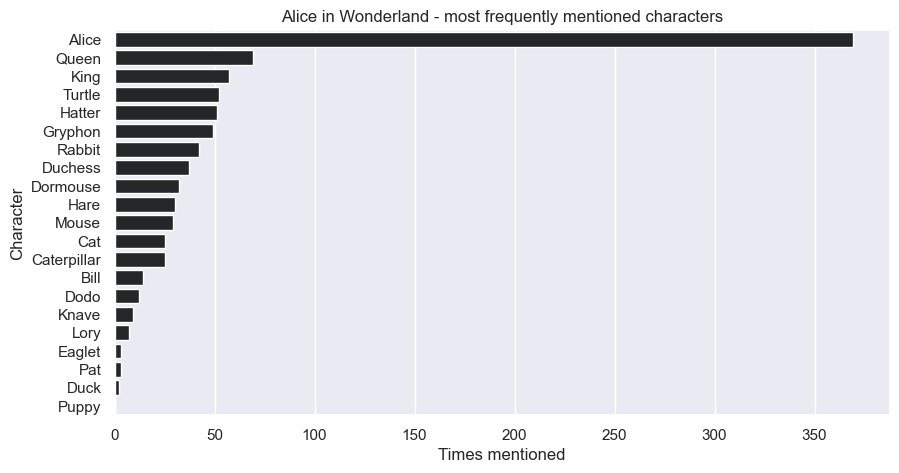

In [173]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Character",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Alice in Wonderland - most frequently mentioned characters")

In [174]:
chars.to_csv("characters_alice.csv")

## Sentiment Analysis

In [175]:
text_sent = TextBlob(str(filtered))

In [176]:
print(text_sent.sentiment)

Sentiment(polarity=0.04454487996502118, subjectivity=0.4972800403573339)
